# 測試 TensorFlow/Keras YOLO格式檔

In [1]:
# 載入套件
from yolo_keras_utils import *
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model

C:\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# 測試
from tensorflow.keras.models import load_model

image_filename = './images_Object_Detection/zebra.jpg' # 測試圖像

model = load_model('./yolov3.h5')   # 載入模型
input_w, input_h = 416, 416      # YOLO v3 圖像尺寸
# 載入圖像，並縮放尺寸為 (416, 416)
image, image_w, image_h = load_image_pixels(image_filename, (input_w, input_h))
# 預測圖像
yhat = model.predict(image)
# 傳回偵測的物件資訊
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [3]:
# 輸出轉換
# 每個陣列內前兩個值為grid寬/高，後四個為 anchors 的作標與尺寸
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# 設定物件偵測的機率門檻
class_threshold = 0.6

# 依 anchors 的尺寸及機率門檻篩選 Bounding Box
boxes = list()
for i in range(len(yhat)):
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    
# 依原圖尺寸與縮放尺寸的比例， 校正 Bounding Box 尺寸
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

#  使用 non-maximal suppress，移除重疊的 Bounding Box
do_nms(boxes, 0.5)

Bounding Box 個數：3
類別：zebra, 機率：94.91055011749268
類別：zebra, 機率：99.86327290534973
類別：zebra, 機率：96.87087535858154


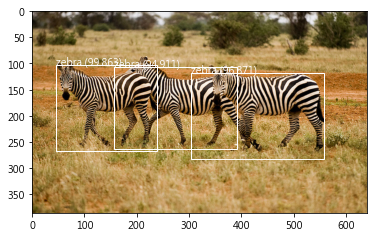

In [4]:
# 取得 Bounding Box 資訊：座標、類別、機率
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

# 顯示執行結果
print(f'Bounding Box 個數：{len(v_boxes)}')
for i in range(len(v_boxes)):
    print(f'類別：{v_labels[i]}, 機率：{v_scores[i]}')

# 繪圖
draw_boxes(image_filename, v_boxes, v_labels, v_scores)